# Venta de Viviendas en Seattle; Modelización Predicitiva - Regresión Lineal.

## Introducción

Se hará uso de un modelo de regresión lineal por ser una técnica tradicional, simple y adecuado para problemas de predicción de variables continuas. Dado que el dataset es sencillo y presenta una estructura limpia y relaciones aproximadamente lineales entre algunas variables independientes y la variable objetivo que posteriormente veremos, este modelo resulta adecuado como punto de partida por su simplicidad, rapidez de entrenamiento y utilidad como línea base comparativa frente a modelos más complejos.

## Modelo de Regresión Lineal

Importamos y cargamos las librerías necesarias para trabajar.

In [1]:
# Procesamiento y visualizacion de datos.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Modelado
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from relativeImp import relativeImp

Leemos el archivo .csv guardado con el dataset depurado.

In [2]:
df = pd.read_csv('C:/Users/jeje9/Projects/Housing Sales Seattle/data/freeze_data/df_imputed_trf.csv')

In [3]:
df

,quarter,Luxury,floors,bedrooms,bathrooms,basement,view,waterfront,condition,sqft_lot,sqft_living,sqft_above,yr_built,renovated,lat,long,price
0,2,1,1,Menor o igual a 5,Mayor a 2,1,0,0,C,9.443355,45.497253,39.242834,"(-inf, 1994.50)",0,47.5936,-122.013,3.938989
1,2,1,1,Menor o igual a 5,Menor o igual a 2,1,0,0,A,8.316642,40.496913,39.242834,"(-inf, 1994.50)",0,47.6624,-122.325,3.942111
2,3,1,1,Menor o igual a 5,Mayor a 2,0,1,0,B,9.038579,60.991803,60.991803,"[1994.50, 2009.50)",0,47.3216,-121.940,3.945572
3,3,1,2,Menor o igual a 5,Mayor a 2,1,0,0,B,8.313803,47.539457,43.358967,"[1994.50, 2009.50)",0,47.6422,-122.361,3.946264
4,3,0,1,Menor o igual a 5,Menor o igual a 2,1,0,0,A,9.090768,45.276926,34.205263,"(-inf, 1994.50)",0,47.7447,-122.328,3.919169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,0,2,Menor o igual a 5,Mayor a 2,1,0,0,B,7.507141,37.282704,34.351128,"[1994.50, 2009.50)",0,47.5537,-122.282,3.915803
4996,1,0,1,Menor o igual a 5,Menor o igual a 2,0,0,0,B,9.006999,40.743098,40.743098,"(-inf, 1994.50)",0,47.4483,-122.129,3.916382
4997,1,0,1,Menor o igual a 5,Menor o igual a 2,0,0,0,C,9.044876,38.470768,38.470768,"(-inf, 1994.50)",0,47.3126,-122.361,3.894635
4998,1,0,1,Menor o igual a 5,Mayor a 2,1,0,0,B,9.846917,50.398413,39.749214,"(-inf, 1994.50)",0,47.7540,-122.144,3.926384


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   quarter      5000 non-null   int64  
 1   Luxury       5000 non-null   int64  
 2   floors       5000 non-null   int64  
 3   bedrooms     5000 non-null   object 
 4   bathrooms    5000 non-null   object 
 5   basement     5000 non-null   int64  
 6   view         5000 non-null   int64  
 7   waterfront   5000 non-null   int64  
 8   condition    5000 non-null   object 
 9   sqft_lot     5000 non-null   float64
 10  sqft_living  5000 non-null   float64
 11  sqft_above   5000 non-null   float64
 12  yr_built     5000 non-null   object 
 13  renovated    5000 non-null   int64  
 14  lat          5000 non-null   float64
 15  long         5000 non-null   float64
 16  price        5000 non-null   float64
dtypes: float64(6), int64(7), object(4)
memory usage: 664.2+ KB


In [5]:
df.nunique()

quarter           3
Luxury            2
floors            3
bedrooms          2
bathrooms         2
basement          2
view              2
waterfront        2
condition         3
sqft_lot       3138
sqft_living     557
sqft_above      516
yr_built          3
renovated         2
lat            2985
long            602
price          1709
dtype: int64

Hagamos unos pequeños ajustes en la tipología de las variables. Algunas se podrían dejar como object, pero por unificar...

In [6]:
for i in df.columns:
    if df[i].nunique() < 4:
        df[i] = df[i].astype('category')

Visualizamos la matriz de correlación de las variables de nuestro dataframe, para tener una visión global de la relación entre variables. Aunque no sea lo más adecuado para ver relaciones, debemos aplicar Label Encoder a las variables object y category.

In [7]:
df = df.copy()

In [8]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

In [9]:
correlation_matrix = df.corr()

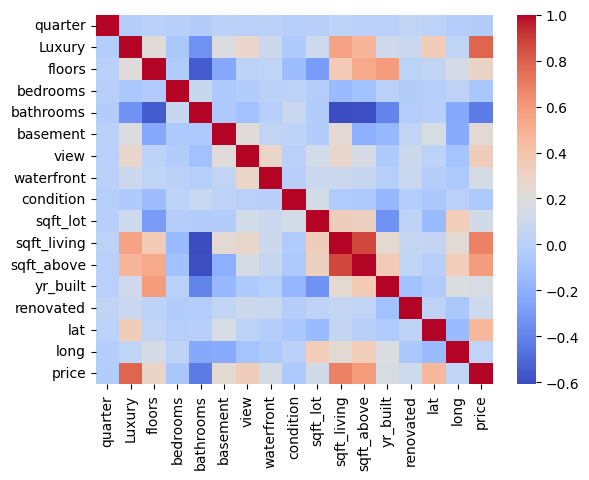

In [10]:
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap="coolwarm", cbar=True)

plt.show()

### Regresión Lineal

#### Modelo Completo

Para el primer modelo, apliquemos con todas las variables predictoras. Además, escalaremos las variables numéricas para que todas tengan la misma importancia en el modelo de regresión. Esto último es opcional pero recomendable si hay variables con diferentes rangos.

In [11]:
features = df.select_dtypes(include=['number', 'object', 'category']).columns.tolist()

features = [col for col in features if col != 'price']

In [12]:
X = df[features]  # Variables predictoras
y = df['price']

In [13]:
num_cols = X.select_dtypes(include='number').columns

scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[num_cols] = scaler.fit_transform(X[num_cols])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=61)

Definimos y aplicamos modelo de regresión lineal.

In [15]:
model = LinearRegression()

In [16]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [17]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'R² Score: {r2}')
print(f'RMSE: {rmse}')

R² Score: 0.7872207734424763
RMSE: 0.010065340270744554


Del modelo completo obtenemos un R2 bastante aceptable y un error cuadrático que parece aún más bajo de lo que en realidad es, puesto que no debemos de olvidar que nuestra variable objetivo price se encuentra tranformada. Visualicemos como se comportan los residuos.

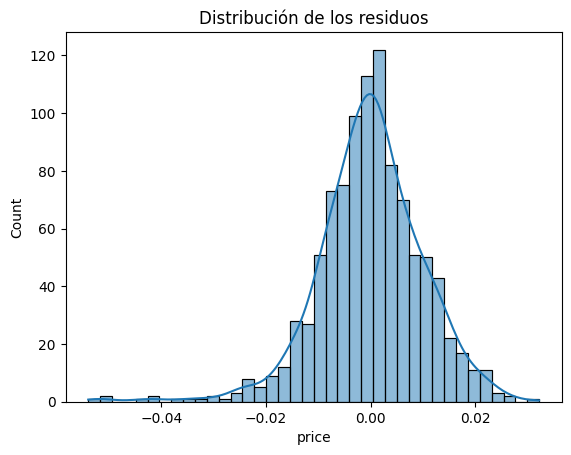

In [18]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Distribución de los residuos")
plt.show()

Se observa que la distribución de los residuos tiene una ligera asimetría a la izquierda. Es decir, los valores por el extremo izquierdo de la distribución difieren de seguir una distribución normal, con esto, se entiende que el modelo tiene dificultades para predecir los valores de la variable objetivo price cuanto más bajos son. Esto último expuesto, lo podemos representar mediante un gráfico de dispersión predicciones vs test.

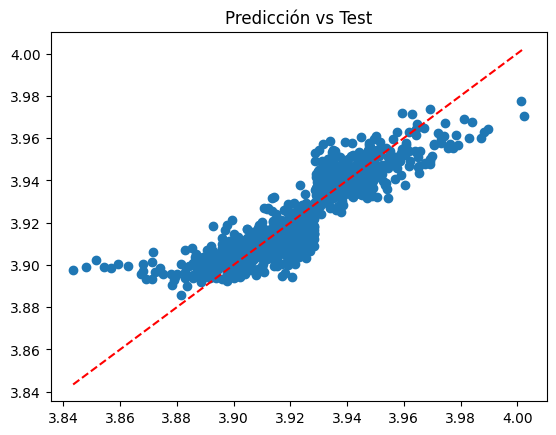

In [19]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'red', linestyle = '--')
plt.title("Predicción vs Test")
plt.show()

Con este primer modelo completo inicial, veamos cuales son las variables que más importancia tienen en el modelo para predecir la variable objetivo price.

In [20]:
df_train = pd.DataFrame(X_train, columns=X.columns)
df_train['price'] = y_train.values

rI = relativeImp(df=df_train, outcomeName='price', driverNames=X.columns.tolist())

rI_sorted = rI.sort_values(by='normRelaImpt', ascending=False)
rI_sorted

,driver,rawRelaImpt,normRelaImpt
1,Luxury,0.268421,33.685085
14,lat,0.131812,16.541534
10,sqft_living,0.123787,15.534457
11,sqft_above,0.103269,12.959629
4,bathrooms,0.043099,5.408696
6,view,0.039531,4.960864
5,basement,0.027300,3.425923
2,floors,0.019476,2.444112
9,sqft_lot,0.010422,1.307879
7,waterfront,0.010170,1.276215


La librería relativeImp ya tiene implementado un método para graficar estas importancias relativas de las variables, pero es poco atractivo visualmente, mejor usar un gráfico de barras.

In [21]:
#rI.plot()

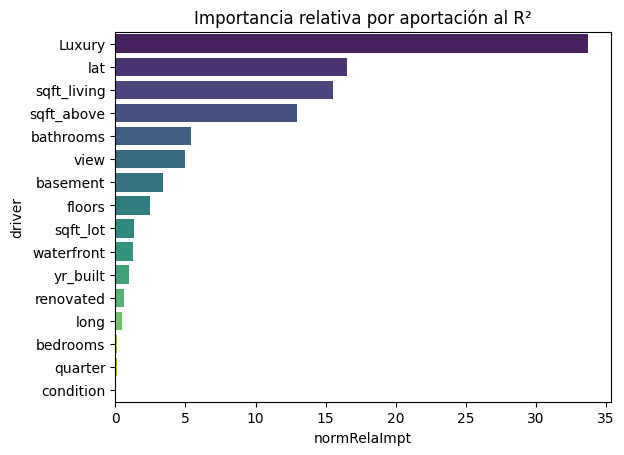

In [22]:
sns.barplot(data = rI_sorted, x='normRelaImpt', y='driver', hue='driver', palette='viridis', legend=False)

plt.title('Importancia relativa por aportación al R²')
plt.show()

Hacemos un segundo modelo más simple con las variables que parecen predecir mejor la variable objetivo.

#### Segundo Modelo

In [23]:
features1 = ['Luxury', 'view', 'sqft_living', 'sqft_above', 'lat', 'bathrooms']

In [24]:
X = df[features1]
y = df['price']

In [25]:
num_cols = X.select_dtypes(include='number').columns

scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[num_cols] = scaler.fit_transform(X[num_cols])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=61)

In [27]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [28]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'R² Score: {r2}')
print(f'RMSE: {rmse}')

R² Score: 0.7836771699642257
RMSE: 0.010148807764658053


Construimos un tercer modelo con un menor número de variables aún, buscando quedarnos con un modelo más simple sin empeorar el modelo de cara a la predicción de la variable objetivo. 

#### Tercer Modelo

In [29]:
features2 = ['Luxury', 'sqft_living', 'sqft_above', 'lat']

In [30]:
X = df[features2]
y = df['price']

In [31]:
num_cols = X.select_dtypes(include='number').columns

scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[num_cols] = scaler.fit_transform(X[num_cols])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=61)

In [33]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [34]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'R² Score: {r2}')
print(f'RMSE: {rmse}')

R² Score: 0.7721966367778463
RMSE: 0.010414631648563672


Con este último modelo, se realiza la evaluación de los distintos modelos de regresión lineal mediante validación cruzada. Se implementa una función cross_val_lin que calcula el coeficiente de determinación para varios modelos, definidos por diferentes fórmulas, y se presentan los resultados de manera clara en un DataFrame.

#### Validación Cruzada

Implementamos la validiación cruzada para los tres modelos contemplados. Esto ayuda a estimar cómo generalizará cada modelo a datos no vistos, reduciendo el riesgo de overfitting o underfitting, para luego tener una mejor valoración final de elección de nuestro modelo.

In [35]:
def cross_val(features, df, y):
    
    X = df[features]

    model = LinearRegression()
    cv = RepeatedKFold(n_splits=5, n_repeats=20, random_state=61)

    r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')
    mse_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-mse_scores)

    return {
        'R2_mean': r2_scores.mean(),
        'R2_std': r2_scores.std(),
        'RMSE_mean': rmse_scores.mean()
    }

Mediante el *RepeatedKFold*, se llevarán a cabo un total de 100 iteraciones: 

• 5 particiones (splits): 4 *trains* y 1 *test*, que van rotando sobre todas las combinaciones de las particiones. 

• 20 repeticiones (repeats): El proceso KFold se realiza 20 veces con diferentes particiones.

Cada iteración generará un R², proporcionando un promedio del R² de cada modelo y una medida de la variabilidad que indica la consistencia del modelo en difrentes particiones, obteniendo así un ajuste de capacidad de generalización de cada modelo.

In [36]:
list_features = [features, features1, features2]

cross_val = [cross_val(f, df, df['price']) for f in list_features]
cross_val_df = pd.DataFrame(cross_val)
cross_val_df.index = ['Modelo 1', 'Modelo 2', 'Modelo 3']
cross_val_df.index.name = 'Modelo'

cross_val_df

,R2_mean,R2_std,RMSE_mean
Modelo,,,
Modelo 1,0.793246,0.009916,0.009752
Modelo 2,0.786465,0.009226,0.009911
Modelo 3,0.775292,0.009638,0.010167


Evidenciamos que los tres modelos evaluados generalizan correctamente ante nuevos datos no vistos. Debido a lo ya expuesto anteriormente, el modelo que ofrece una mejor explicabilidad sin penalizar demasiado la predicción de la variable objetivo es el modelo 2, con un coeficiente de determinación bastante bueno muy poco inferior respecto al modelo completo reduciendo dráscticamente el número de variables.

## Autor: Alfonso Guisado González